# Simplyfied geologic model of a volcanic diatreme structure in a layered subsurface

## written by Anton Ziegon

In [192]:
# Imports and settings
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

import gempy as gp

# Importing auxiliary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Setting options
np.random.seed(420)
pd.set_option('precision', 2)

### Model Parameters

In [193]:
# extent
x0 = 0
x1 = 150
y0 = 0
y1 = 150 
z0 = -60
z1 = 10
# resolution
nx = 150
ny = 150
nz = 200

section_idx = int(50 / ((y1-y0)/ny)) # to get y value that intersects close to cone axis

### Creating layered subsurface model

Active grids: ['regular']
Active grids: ['regular' 'topography']


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


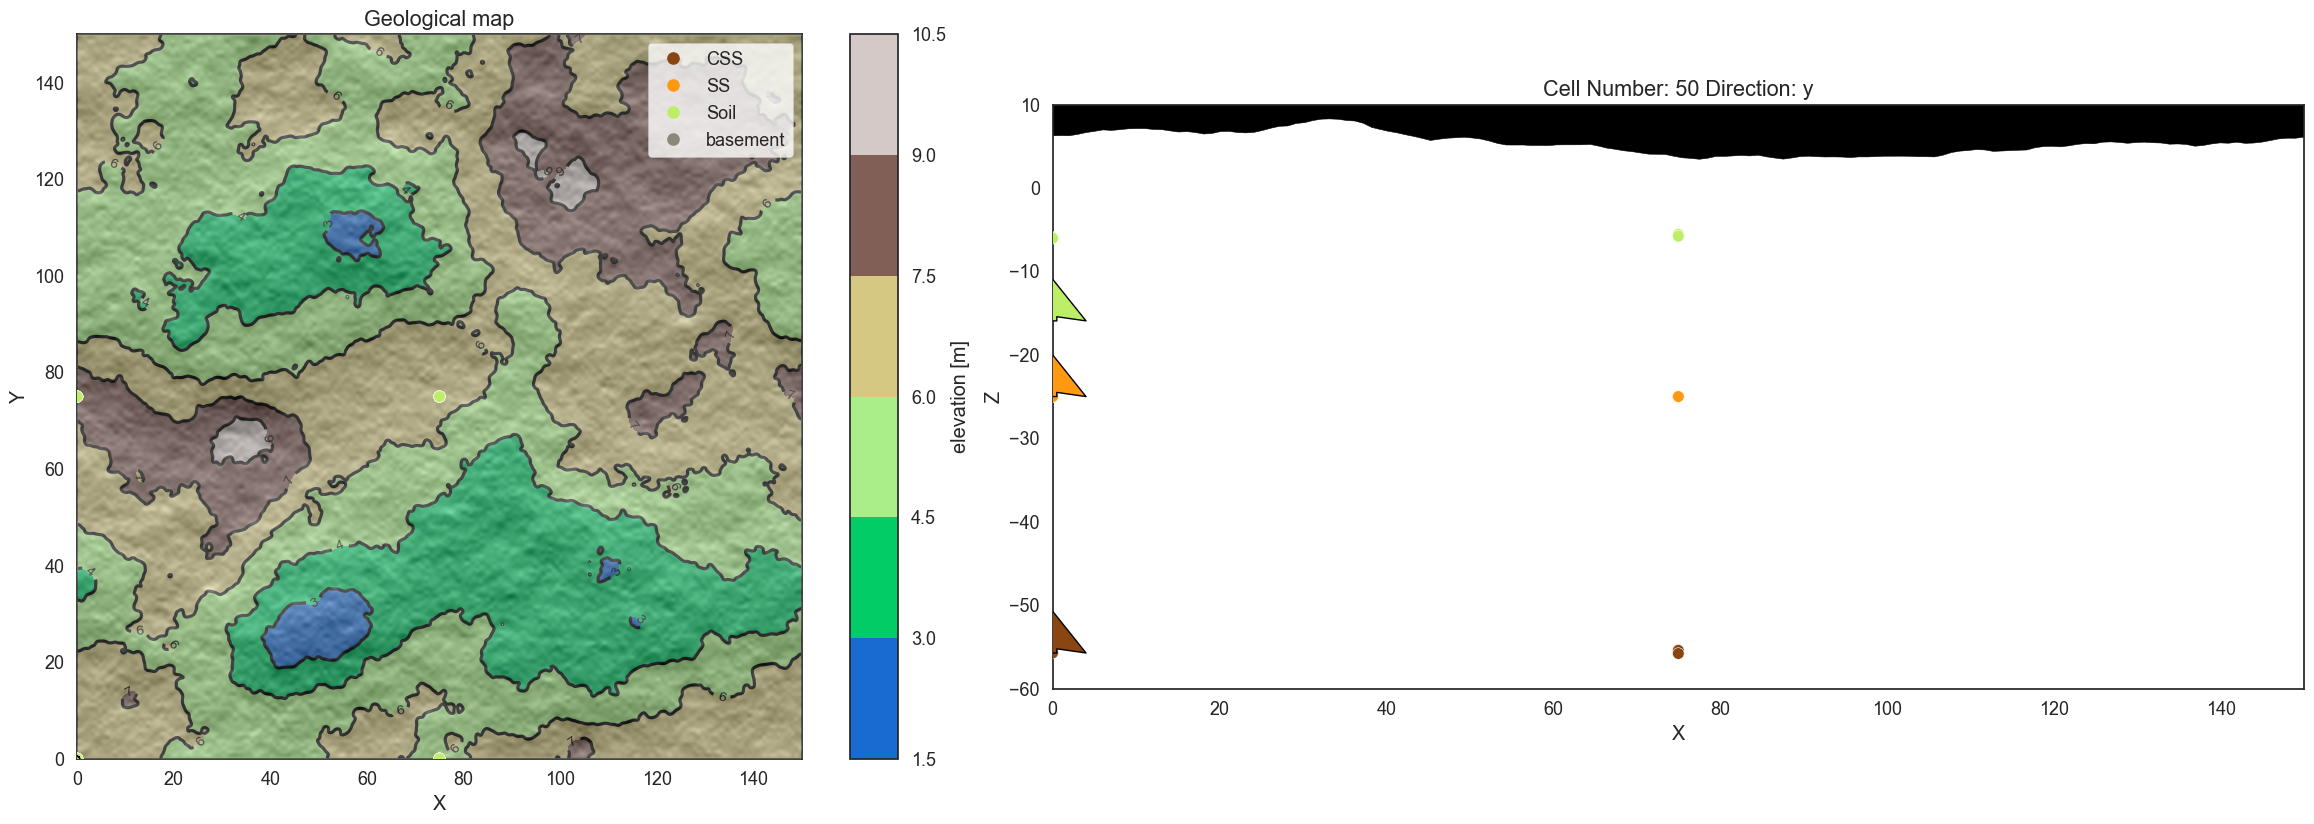

In [194]:
geo_model_layers = gp.create_model('simple_layers')

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model_layers, [x0, x1, y0, y1, z0, z1], [nx,ny,nz],
             path_i='RM_surface_points_layers.csv', path_o='RM_orientations_layers.csv',
             default_values=True)

# Mapping layers to surface
gp.map_stack_to_surfaces(geo_model_layers,
                         {"Layers":('Soil','SS','CSS','basement')},
                         remove_unused_series=True)

# Adjusting colors
geo_model_layers.surfaces.colors.change_colors({'CSS': '#8b4513','SS':'#ff9912',
                                                'basement':'#8b8878','Soil':'#bcee68'})

# Adding Topography
geo_model_layers.set_topography(source='saved', filepath='model_topo.npy')

# Visualization of data points
plot = gp.plot_2d(geo_model_layers, show_lith=False, show_boundaries=False, show_topography=True,  cell_number=section_idx, section_names=['topography'])
#gpv = gp.plot_3d(geo_model_layers, image=False, plotter_type='basic', show_topography=True)

Set interpolator and solve model

In [195]:
gp.set_interpolator(geo_model_layers, compile_theano=True, theano_optimizer='fast_compile')
sol_layers = gp.compute_model(geo_model_layers, debug=False)

Setting kriging parameters to their default values.
Compiling theano function...


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are prob

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            223.38
$C_o$            1188.1
drift equations     [3]


Resulting 3D model

In [196]:
#ver, sim = gp.get_surfaces(geo_model_layers)
#gpv = gp.plot_3d(geo_model_layers, show_data=True, show_lith=True, image=False, plotter_type='background')

Resulting 2D section through 20th y-value (should be at 50,...)

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


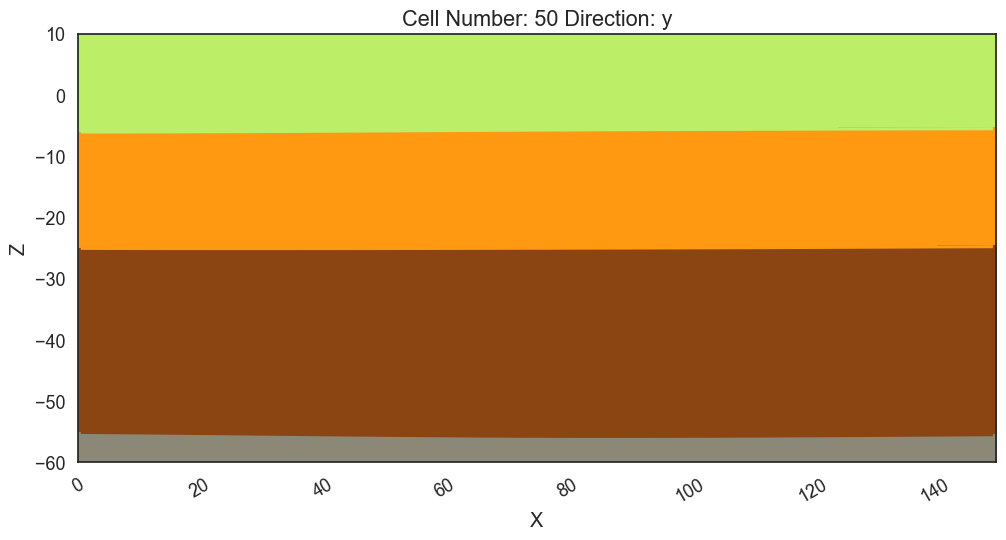

In [197]:
gp.plot_2d(geo_model_layers, show_data=False, direction='y', cell_number=section_idx,
           plot_data=True)

In [198]:
geo_model_layers.surfaces

,surface,series,order_surfaces,color,id
2,Soil,Layers,1,#bcee68,1
1,SS,Layers,2,#ff9912,2
0,CSS,Layers,3,#8b4513,3
3,basement,Layers,4,#8b8878,4


### Creating simple diatreme model

Active grids: ['regular']


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


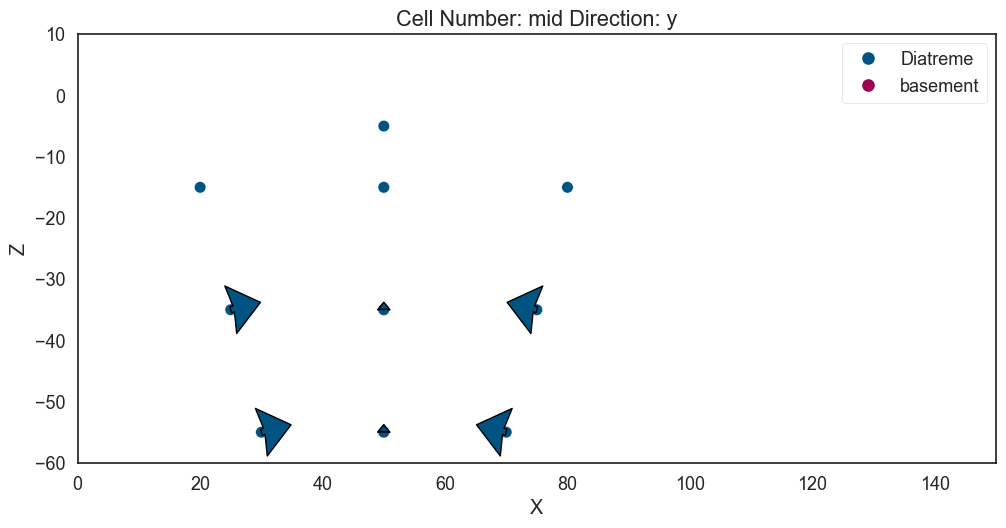

In [199]:
geo_model_diatreme = gp.create_model('simple_diatreme')

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model_diatreme, [x0, x1, y0, y1, z0, z1], [nx,ny,nz],
             path_i='RM_surface_points_diatreme_easy.csv', path_o='RM_orientations_diatreme_easy.csv',
             default_values=True)

# Mapping layers to surface
gp.map_stack_to_surfaces(geo_model_diatreme,
                         {"Lith":('Diatreme','basement')},
                         remove_unused_series=True)

# Visualization of data points
plot = gp.plot_2d(geo_model_diatreme, show_lith=False, show_boundaries=False, show_topography=False)
#gpv = gp.plot_3d(geo_model_diatreme, image=False, plotter_type='background', show_topography=False)

Set interpolator and solve model

In [200]:
gp.set_interpolator(geo_model_diatreme, compile_theano=True, theano_optimizer='fast_compile')
sol_diatreme = gp.compute_model(geo_model_diatreme, debug=False)

Setting kriging parameters to their default values.
Compiling theano function...


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are prob

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            223.38
$C_o$            1188.1
drift equations     [3]


Resulting 3D model

In [201]:
#ver, sim = gp.get_surfaces(geo_model_diatreme)
#gpv = gp.plot_3d(geo_model_diatreme, show_data=False, show_lith=False, image=False, plotter_type='background')

Resulting 2D section through 33rd y-value (should be at 50,..)

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


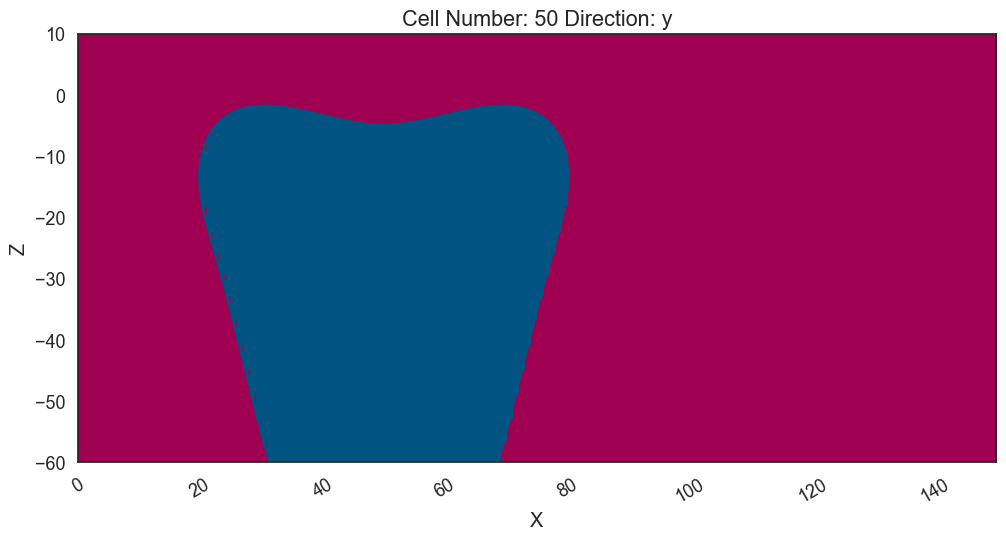

In [202]:
gp.plot_2d(geo_model_diatreme, show_data=False, direction='y', cell_number=section_idx,
           plot_data=True, show_topography=False)

In [203]:
geo_model_diatreme.surfaces

,surface,series,order_surfaces,color,id
0,Diatreme,Lith,1,#015482,1
1,basement,Lith,2,#9f0052,2


### Combining both models

In [204]:
geo_model_layers.add_surfaces(['diatreme'])

,surface,series,order_surfaces,color,id
2,Soil,Layers,1,#015482,1
1,SS,Layers,2,#9f0052,2
0,CSS,Layers,3,#ffbe00,3
3,basement,Layers,4,#728f02,4
4,diatreme,Layers,5,#443988,5


In [205]:
# where do model result voxels have the ID 1 (diatreme structure in diatreme model)
inds = np.where(sol_diatreme.lith_block==1.)

sol_combined = sol_layers

sol_combined.lith_block[inds] = 5.

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


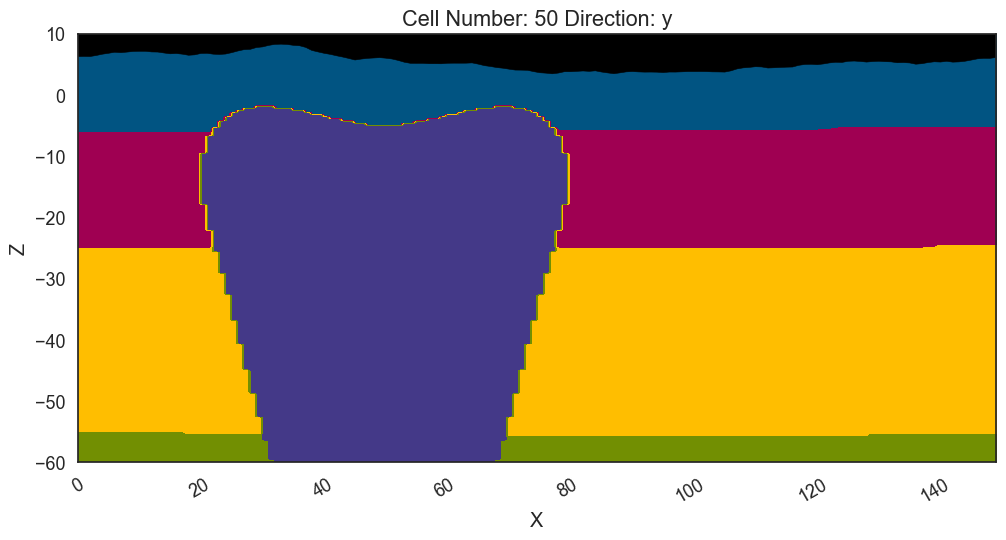

In [206]:
gp.plot_2d(geo_model_layers, direction='y', show_block=True, show_boundaries=False, cell_number=section_idx,
           show_data=False, show_results=True, show_topography=True)

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


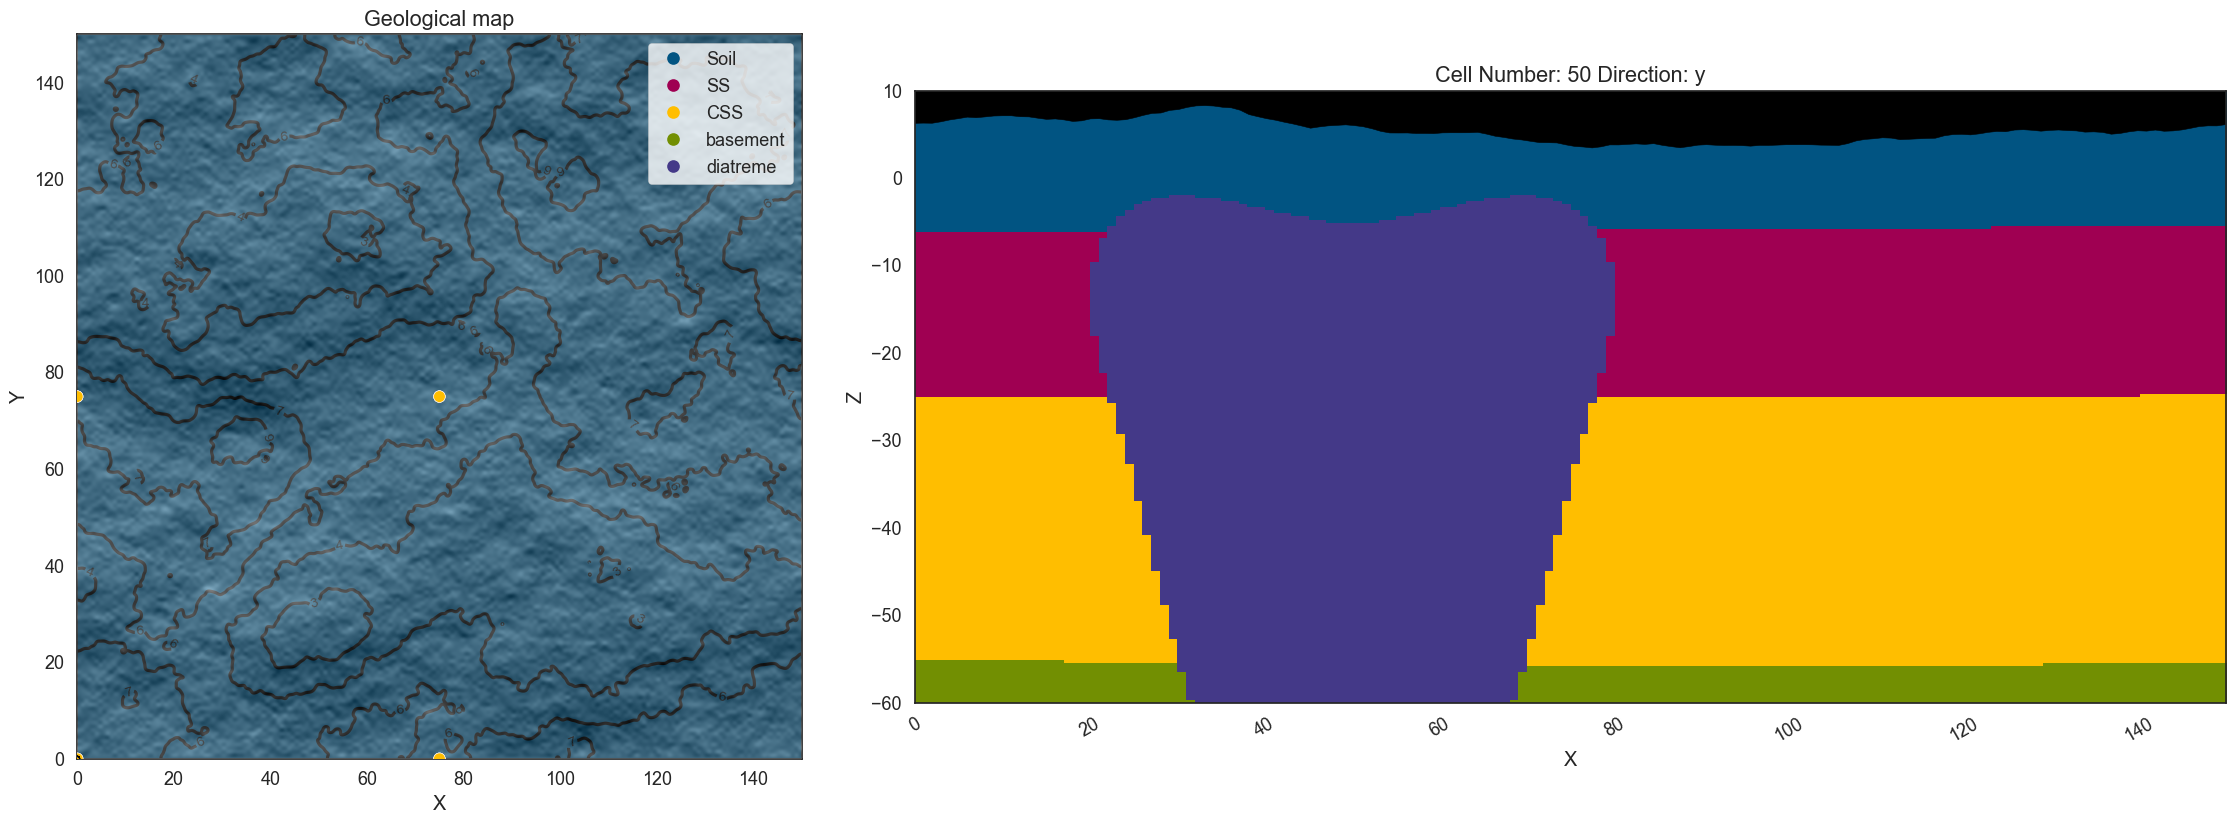

In [207]:
gp.plot_2d(geo_model_layers, direction='y', show_block=True, show_boundaries=False, cell_number=section_idx,
           show_data=False, show_results=True, show_topography=True, section_names=['topography'])